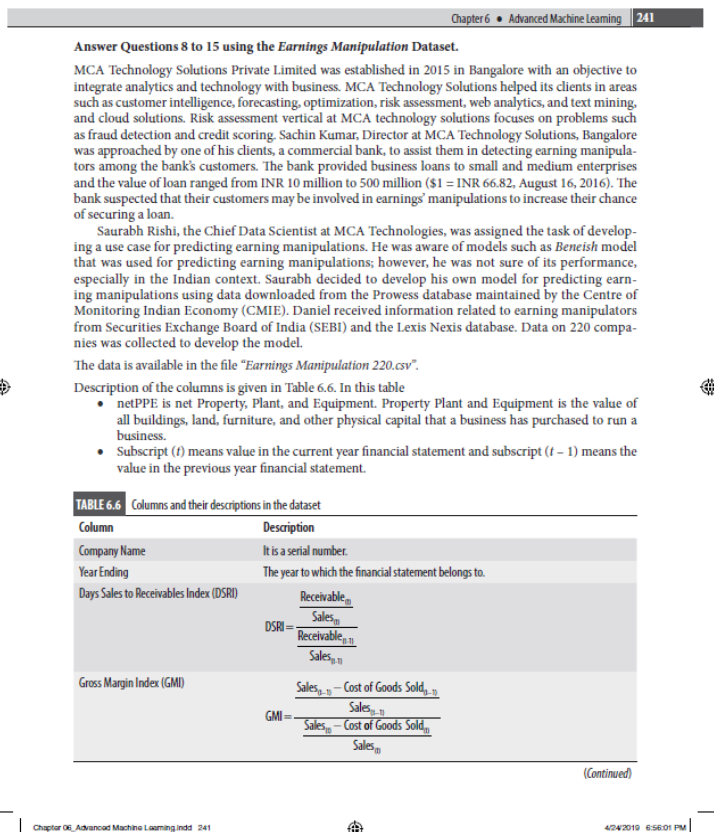

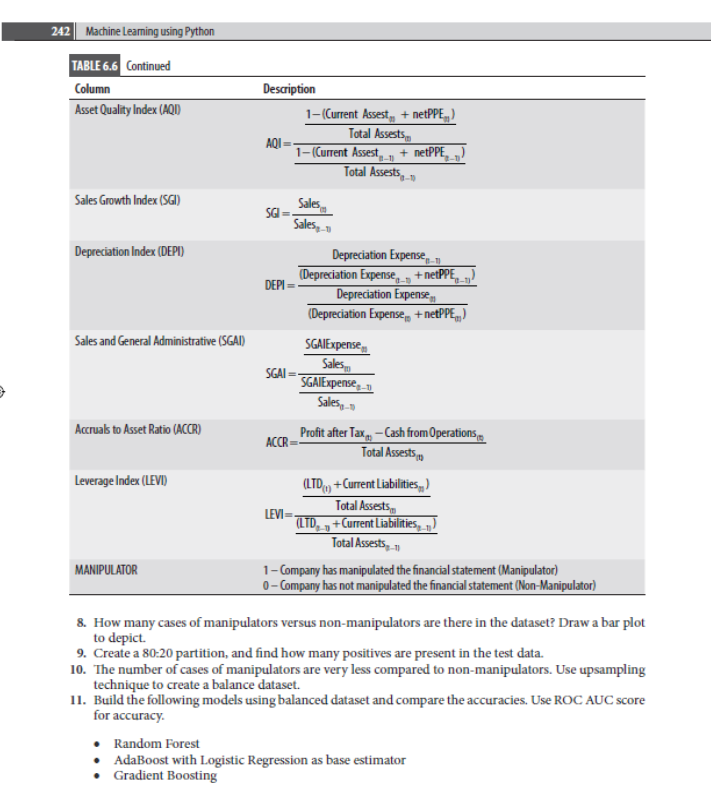

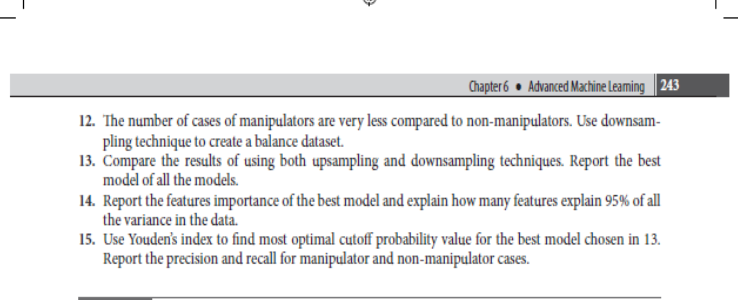

In [1]:
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv(r"D:f\Codes-Data-Files\Machine Learning (Codes and Data Files)\Data\python\Earnings Manipulation 220.csv")

In [3]:
df.sample(6) #  6 sample records from the dataset

,Company Name,Year Ending,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,MANIPULATOR
18,19,31-03-2015,0.615328,0.859324,0.899378,1.716066,0.942606,1.566082,0.132832,0.138589,1
85,86,31-03-2014,1.039538,0.914815,6.343375,1.142681,0.974963,0.906175,-0.041652,0.882262,0
7,8,31-03-2015,7.659976,0.580184,1.035791,1.485440,0.678833,0.653651,0.003652,1.101591,1
109,110,31-03-2014,3.203489,1.062419,1.003195,0.370895,4.229119,1.022046,0.041263,0.853683,0
32,33,31-03-2012,1.009934,1.095584,5.702904,0.902743,1.237174,0.624588,0.007920,2.556236,1
138,139,31-03-2014,0.765570,1.096726,1.241636,0.907920,0.994893,1.261719,-0.116462,0.984939,0


In [4]:
df.info()  # No nan or null values are present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  220 non-null    int64  
 1   Year Ending   220 non-null    object 
 2   DSRI          220 non-null    float64
 3   GMI           220 non-null    float64
 4   AQI           220 non-null    float64
 5   SGI           220 non-null    float64
 6   DEPI          220 non-null    float64
 7   SGAI          220 non-null    float64
 8   ACCR          220 non-null    float64
 9   LEVI          220 non-null    float64
 10  MANIPULATOR   220 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 19.0+ KB


###### The dataset contains records for 220 companies registered with SEBI, and Lexis Nexis Database , and their financial ratios

In [5]:
df['MANIPULATOR'].value_counts()

0    181
1     39
Name: MANIPULATOR, dtype: int64

The dataset is unbalanced, as the number of negative class observations are very high , compared to the number of observations in the positive class. We will upsample the data for the positive class in the next codes

# 1= The company has manipulated
# 2= The company is not involved in manipulating its statements

The response variable column for this dataset, is "MANIPULATOR" .A value of 1, stands for manupulator, and a value of 0, stands for non-manupulator. Let's first convert all the column names to lower case letters

In [6]:
df.columns = df.columns.map(str.lower)   # convert all column names to lower case letters

### Balancing The Imbalanced Dataset 

In [7]:
from sklearn.utils import resample  # import both the required library to resample the data
from sklearn.utils import shuffle

Create 2 datasets, where the manipulator column has values of 1 and 0. In other words split the  dataset
into two parts, based on the values 1 and 0 in the manipulator column, such that, the way we apply filters in MSExcel. One dataset will have only value 0 in manipulator column, and the other will have only value of  1 in manipulator column. Once we will have both the dataframe's with us
, the next task is to upsample the minority class 1.

In [8]:
df_1 = df[df.manipulator== 1]
# slicing a dataframe where manipulator column has 1 as value

df_0 = df[df.manipulator== 0]
# slicing a dataframe where manipulator column has 0 as value

In [9]:
print(df_1 ['manipulator'].value_counts())
print(df_0 ['manipulator'].value_counts())  # slicing of two dataframe is successfull

1    39
Name: manipulator, dtype: int64
0    181
Name: manipulator, dtype: int64


Looking at the above value couts on both the datasets, it is evident that 2 datasets have been created for
both the values 0, and 1 , for the manipulator column

The next task is to upsample the minority class. In this case , the manipulator column, 1 class, is the minority class for us. We will resample the data from the dataframe we splitted for the 1 class label, and will be taking sampling with replacement. Using SkLearn's resample method, we can increase the number of samples in any dataset , with any choice of number of observations to resample. In the next code, I will upsample the dataset, df_1 , and finally the number of observations in this dataset, will change from 39 to 150.

In [10]:
df_upsample_1 = resample(df_1,replace=True,n_samples=150)

# upsampling and , Inserting  new observations based on, sampling with replacement

In [11]:
df_upsample_1 ['manipulator'].value_counts()   # dataset contains a total of 120 observations  

1    150
Name: manipulator, dtype: int64

### Join both  dataframes  to make a single dataset

In [12]:
# join both the df's together to make a single dataset containg both the class labels 0, and 1
df_new = pd.concat([df_upsample_1,df_0])

In [13]:
df_new.info()  # This is our new dataset we will be working with

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 2 to 219
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company name  331 non-null    int64  
 1   year ending   331 non-null    object 
 2   dsri          331 non-null    float64
 3   gmi           331 non-null    float64
 4   aqi           331 non-null    float64
 5   sgi           331 non-null    float64
 6   depi          331 non-null    float64
 7   sgai          331 non-null    float64
 8   accr          331 non-null    float64
 9   levi          331 non-null    float64
 10  manipulator   331 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 31.0+ KB


We, resampled the minority class and joined both
the datasets together, to make one single dataset. It might happen that the upsampled dataset, might have been remained in a particular order. To remove any particula order from the data, we can use SkLearn shuffle method to shuffle the data, and eliminate any particular order. It's like randomly picking up the records, instead of following the index pattern. 


In [14]:
df = shuffle(df_new)   
# shuffling the dataframe ,so it does not remain in any particular order

In [15]:
df.tail(6)  # the new shuffled dataset.The row index is disordered as it has benn shuffled

,company name,year ending,dsri,gmi,aqi,sgi,depi,sgai,accr,levi,manipulator
21,22,31-03-2008,1.000000,0.872010,0.652510,13.064653,1.103716,0.096956,0.041028,1.176655,1
63,64,31-03-2014,3.018628,0.789109,0.816912,0.256386,1.369847,2.027557,0.110765,1.058538,0
7,8,31-03-2015,7.659976,0.580184,1.035791,1.485440,0.678833,0.653651,0.003652,1.101591,1
76,77,31-03-2014,3.832249,-0.960680,1.400704,1.157536,1.438813,1.460379,0.183419,1.120737,0
107,108,31-03-2014,0.541876,0.994946,1.204296,1.239047,1.078844,0.853511,-0.074609,1.004252,0
166,167,31-03-2014,1.404746,0.934590,3.987590,0.926783,1.103845,0.696446,-0.112703,1.072661,0


In [16]:
df['manipulator'].value_counts()

0    181
1    150
Name: manipulator, dtype: int64

It is clear from the above lines, we now have a balanced dataset. The model prediction would not be biased
towards any class label, and we are sure, to produce a balanced prediction every time we run a new model, or, implement any new machine learning algorithm.

The dataset is ready with all aspects, to apply any ML Classifier. But, before moving forward, have a look at the company name attribute. Company name attribute is just a serial number that has been applied, instead of company name. A company name or serial number has no significance in ML classifiers, so it is adviced to drop it.

In [17]:
df = df.drop('company name',axis=1)  # Drop 'company name' column from the dataset

##### Convert categorical variables into dummy variables

In [18]:
# This is the only object datatype we have here, and shall be converted into dummy variable
df['year ending'].unique()

array(['31-03-2014', '31-03-2015', '31-03-2012', '31-03-2010',
       '31-03-2008', '30-09-2012', '31-03-2011', '31-03-2013',
       '31-03-2009'], dtype=object)

In [19]:
# Convert categorical variable to dummy variable
df_encode = pd.get_dummies(df,drop_first=True)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
y= df_encode ['manipulator']                           # Select Response variable

x_features = df_encode.drop(['manipulator'],axis=1)   # Slice Explanatory variables

x = x_features                                        # Select explanatory variables

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split ( x,y, test_size=.20,  random_state=100)

In [23]:
clf = LogisticRegression ()

clf.fit(x_train,y_train)
pred = clf.predict(x)

In [24]:
 # print the acccuracy for the classifier
accuracy = accuracy_score(pred, y)   
print("Accuracy for the model is",round(accuracy,2)*100,"%")

Accuracy for the model is 97.0 %


##### What the model predicts on test data? Working with X_test, and y_test.

Creating a dataset for actual and predicted values from the test dataset


In [25]:
# create a dataset for actual and predicted values and call it y_pred_df_2
y_pred = pd.DataFrame({'actual':y_test,'predicted':clf.predict(x_test)})

y_pred.sample(4)  # this is how the dataframe for acutal and predicted values looks like

,actual,predicted
21,1,1
81,0,0
11,1,1
15,1,1


### Confusion Matrix for Balanced test dataset

In [26]:
# Store confusion matrix into cm variable

from sklearn import metrics
cm = metrics.confusion_matrix(y_pred['actual'],y_pred['predicted'])

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.97      0.98        31

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.99      0.99      0.99        67



Text(0.5, 1, '| Confusion Matrix   for   Logistic Regression  |')

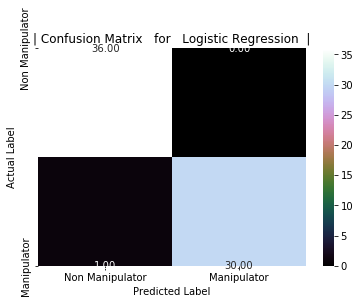

In [27]:
# Print the classification report along with confusion matrix

report = metrics.classification_report(y_pred['actual'],
                                         y_pred['predicted'])
print(report)

# Plot the confusion matrix on a heatmap using seaborn
sn.heatmap(cm,annot=True,fmt='.2f',cmap='cubehelix',
           yticklabels=['Non Manipulator','Manipulator'],
          xticklabels=['Non Manipulator','Manipulator'])

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("| Confusion Matrix   for   Logistic Regression  |")

How many mistakes the model is committing?

The model has wrongly classified, only one case, of Non manipulator into a Manipulator,out of a total of 48 cases.


The model has wrongly classified , two cases, of Manipulator into a Non Manipulator, out of 35 cases

## NOTE :- Running the notebook codes multiple times , would produce  different result at each run. Nevertheless, the magnitude of results remain more or less similar or under control.

###### Recall is the ability of the model to correctly classify positives and negatives, aka,  sensitivity and specificity respectively

###### Precision is about being precise, i.e, how accurate our model is. In other words when a model makes a prediction, how often it is correct.




### Is this model acceptable for practical applications ?

To accept a model for practical applications, AUC score of atleat 0.7 is required. AUC is the area under the
curve of the Receiver operating characteristics curve. To find the AUC for the above model, we need to 
create a new dataframe and store the probability values for both the class labels 0, and 1. The model's
predict_proba() method gives the predicted probability for the test examples, and can be passed to 
roc_aur_score() along with actual class labels to obtain AUC score

In [28]:
# the dataframe will have two columns for probabilty values of , 0 and 1 

y_pred_probs = clf.predict_proba(x_test)[::,1]  # slice array for taget class 1

# We are slicing this array to use probabilities for only the target class, 1

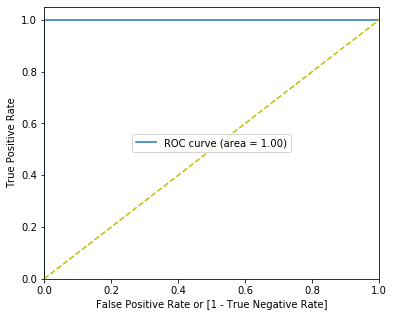

In [29]:

fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_probs)  # Store fpr,tpr, and thresholds

auc = metrics.roc_auc_score(y_test,y_pred_probs)             # Store the auc score

plt.figure(figsize=(6, 5))
plt.plot(fpr,tpr,label= 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'y--')                               # Plot a diagonal line at 45 degrees
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc="center")
plt.show()

In [30]:
print('The AUC for the above ROC chart is ', round(auc,2)*100,end='%')

The AUC for the above ROC chart is  100.0%

## Is the Model Over-fitting?. ( Cross Validation)

To know whether this model is overfitting or not, we should run cross validation on the model, taking roc auc as the scoring parameter. We will run cross validation 10 times and , finally print the mean accuracy score and the standard deviation of the scores

In [31]:
from sklearn.model_selection import cross_val_score
model =clf
cv_scores = cross_val_score(model,x_train,y_train,cv=10,scoring= "roc_auc")
print("CV Score are",cv_scores)
print("-----------------------------------------------------------------------------------")
print("Mean Accuracy is",cv_scores.mean(),"with standard deviation of",cv_scores.std())

CV Score are [0.98888889 0.99444444 1.         1.         0.96363636 1.
 0.875      1.         0.98214286 1.        ]
-----------------------------------------------------------------------------------
Mean Accuracy is 0.9804112554112555 with standard deviation of 0.036855560560966644


The mean accuracy is very high .98, and the standard deviation is very less 0.010

##### The Area under the curve is outstanding, and is more than 70 %, and it's a green signal, to use this model for building Machine Learning models.

# Feature Importance

model.coef_ , in logistic regression stores the coefficients for the logistic regression model. We will, 
first, store all the coefficients corresponding to a particular variabel into a new object called coef.

It is a simple task of extracting the coefficients, 
and saving them along with sorting them in descending order of importance. We will plot a simple barplot for
the coefficients associated with a  variable, and will notice its effect on the variation in Y.


###### How many explanatory variables do we have for prediction?

In [32]:
print("We have a total of ",x_test.columns.size,"variables as independent variables")

We have a total of  16 variables as independent variables


In [33]:
coefficients = clf.coef_.reshape([16,])  # Reshape array into 16 rows and 1 column,and name it coef

In [34]:
# coef_df is a dataframe containng the variable names and their respective coefficient
coef_df = pd.DataFrame ({'features':x.columns,'coeff':coefficients}) 

Text(0.5, 1.0, 'BAR PLOT FOR REGRESSION COEFFICIENTS')

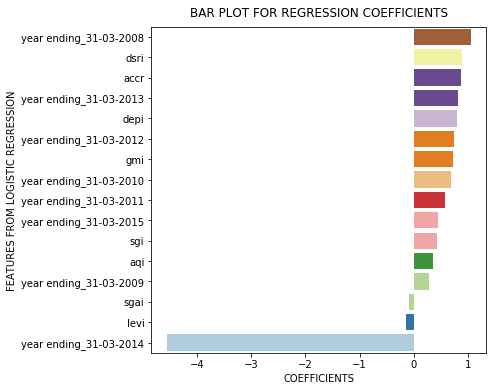

In [35]:
 # Bar plot , to visualize the regression coefficients
plt.figure (figsize= [6,6])
sn.barplot (y='features',x='coeff', palette= 'Paired_r',
           data = coef_df.sort_values
           ('coeff',ascending=False))  # Sort the data in descending order

plt.ylabel (str.upper ("features from logistic regression"))
plt.xlabel (str.upper ("coefficients"))
plt.title  (str.upper ("bar plot for regression coefficients"),pad=10)


From the above plot, we can infer that, all other variables, except, SGAI, LEVI, YEAR END 31-03-2014, increases the probability of a company to turn into a MANIPULATOR.

An increase in all other variables, except,SGAI, LEVI, YEAR END 31-03-2014, increases the probability of a company to manipulate its earnings.

Whereas, an increase in, SGAI, LEVI, and presence of YEAR END 31-03-2014 variables decreases the probability of a company to turn into a MANIPULATOR.

### Finding optimal classification cut-off probability    ---                        | Youden's Index |

In [36]:
tpr_fpr = pd.DataFrame({'tpr':tpr,'fpr':fpr,'thresholds':thresholds})
# pass dict for tpr fpr and thersholds and create a dataframe tpr_fpr

tpr_fpr['difference'] = tpr_fpr.tpr - tpr_fpr.fpr
# insert a new column 'difference', which is the difference between tpr and fpr

tpr_fpr.sort_values('difference',ascending=False)[0:5].round(2)
#sort the new dataframe in descending order to look for max difference,aka J-statistics in diff column


,tpr,fpr,thresholds,difference
11,1.00,0.0,0.42,1.00
10,0.87,0.0,0.93,0.87
9,0.81,0.0,0.94,0.81
8,0.61,0.0,0.97,0.61
7,0.55,0.0,0.98,0.55


As observed from the above table, the difference is maximum, at a threshold value of 0.63

In [37]:
y_pred_youdens = pd.DataFrame({'actual':y_test, 'probability class_1': 
                               clf.predict_proba(x_test)[::,1]})

y_pred_youdens['predicted'] = y_pred_youdens['probability class_1'].map(lambda x:1 
                                                                          if x>.63 else 0)

# create new dataframe with actual and predicted probability
# insert new column 'predicted', using lambda. Map probability >.63 as 1, and 0 if probability <.63

y_pred_youdens.sample(6)  #  6 randomly chosen records

,actual,probability class_1,predicted
170,0,0.097762,0
151,0,0.041117,0
36,1,0.932915,1
147,0,0.126946,0
34,1,0.938309,1
29,1,1.000000,1


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.97      0.98        31

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.99      0.99      0.99        67



Text(0.5, 1, "Confusion Matrix Using Youden's Index |P=.63|")

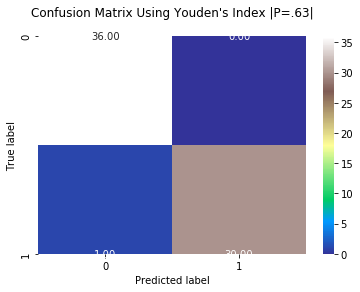

In [38]:

report_youdens = metrics.classification_report(y_pred_youdens['actual'],
                                                       y_pred_youdens['predicted'])

# classification_report in sklearn metrics method is needed to print the report
print(report_youdens)
cm_youdens = metrics.confusion_matrix( y_pred_youdens.actual,y_pred_youdens.predicted )

plt.figure(figsize=[6,4])

sn.heatmap(cm_youdens,annot=True,fmt='.2f',cmap='terrain')  #pass fmt=.2f.

plt.ylabel('True label')    
plt.xlabel('Predicted label')
plt.title("Confusion Matrix Using Youden's Index |P=.63|", pad= 20 )



#### I can observe no changes in FP & TP . Why?. It's because  we already balanced the dataset .

It's is a mathematical model , and think about it. A mathematical model is   able to provide us, with so
good accuracy and recall rate. There are other faactors , which , are out of control of Statistics. Factors like,
a persons intentions, his motive, his\her stability with job\business. 

### The model is very good at identifying the companies manipulating their financial statements. All the measures such as  AUC, recall , precision , f1 are very high for both the class labels 0 and 1.

No other model is required, as per the comfusion matrix and its accuracy, nevertheless we can always implement another ML algorithm and compare the classification reports.

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------